In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import numpy as np
import seaborn as sns

from ipynb.fs.full.common import *


In [2]:
# load gameplays
gameplays = pd.json_normalize(pd.Series(open(r"C:\Users\Yasmine Bogaert\Documents\thesis\dump\dump_30-03-2021\csv\gameplays.json").readlines()).apply(json.loads))
gameplays = preprocess_gameplays(gameplays)
gameplays = add_distance_per_jump(gameplays)

In [4]:
# load questionresponses and expand the response columns to contain "lastentry" and "secondlastentry" instead of 'A', 'B' or 'BOTH'
questionresponses = pd.json_normalize(pd.Series(open(r"C:\Users\Yasmine Bogaert\Documents\thesis\dump\dump_30-03-2021\csv\questionresponses.json").readlines()).apply(json.loads))
questionresponses = expand_questionresponses(questionresponses)

<ipython-input-77-b7868d77de3a>:27: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(ncols=3)


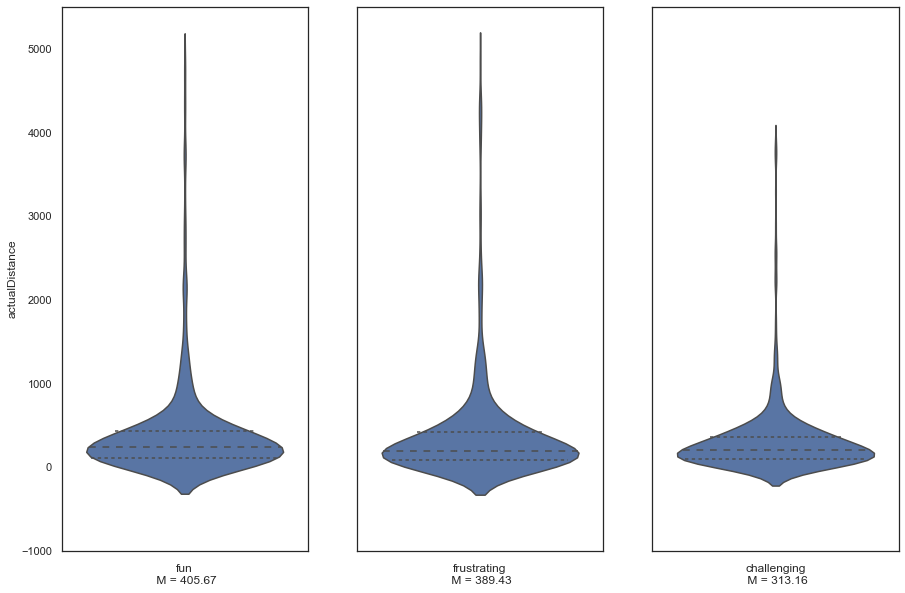

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

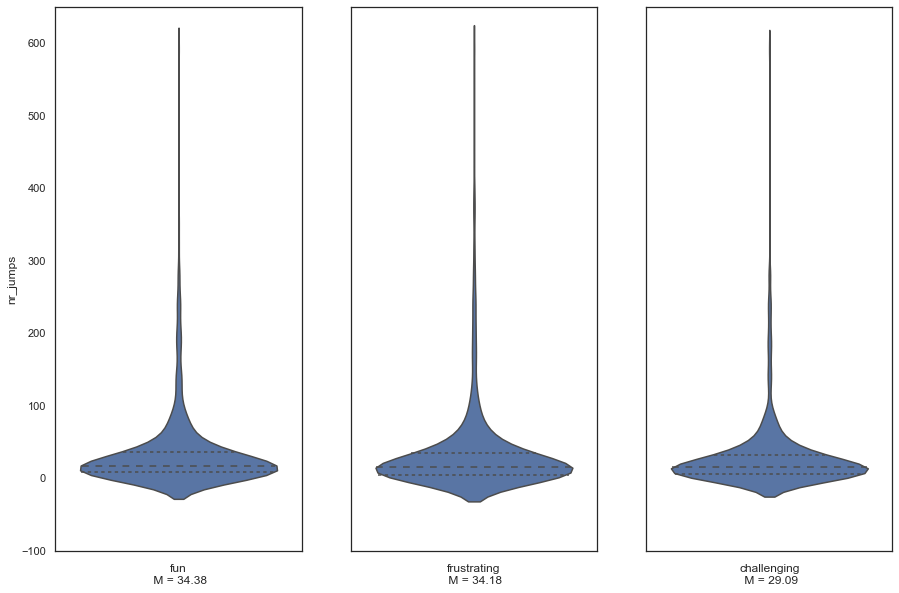

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

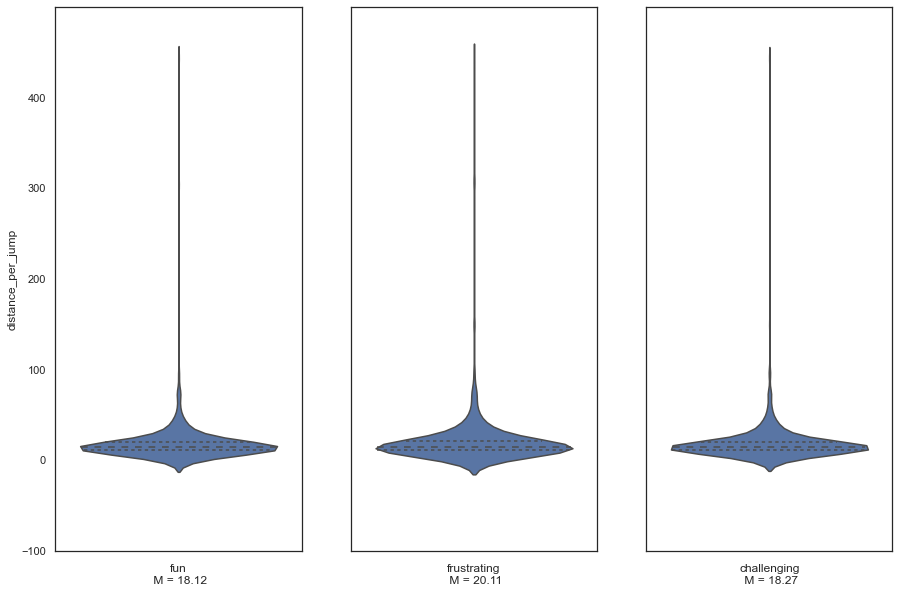

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

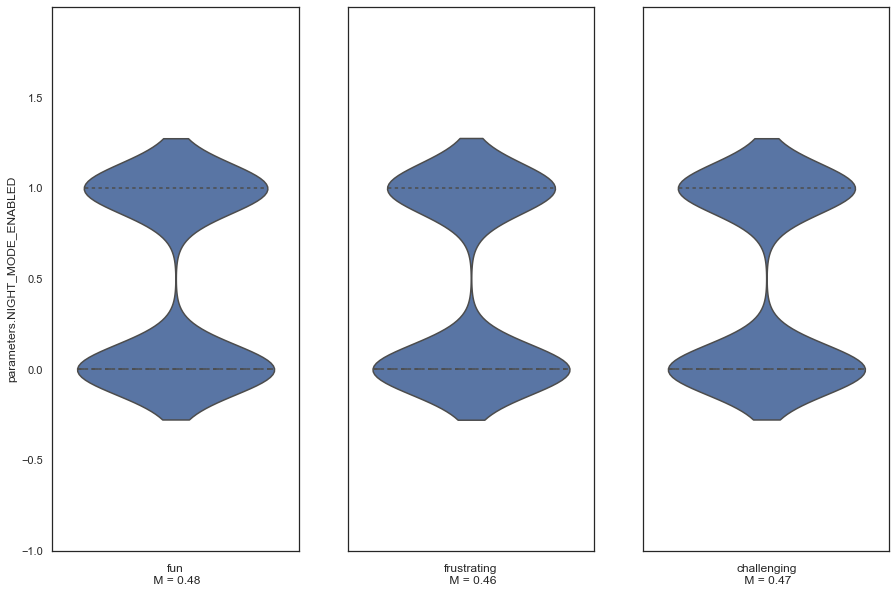

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

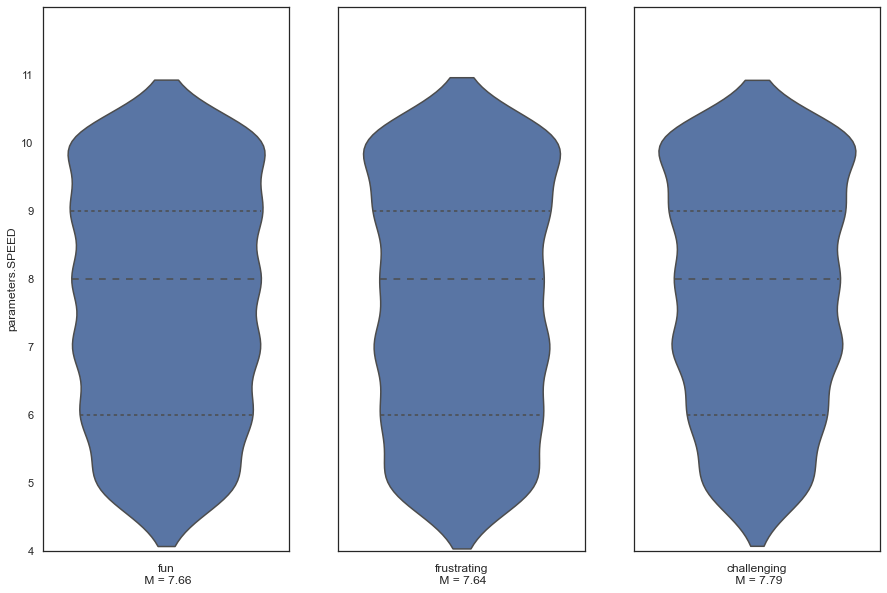

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

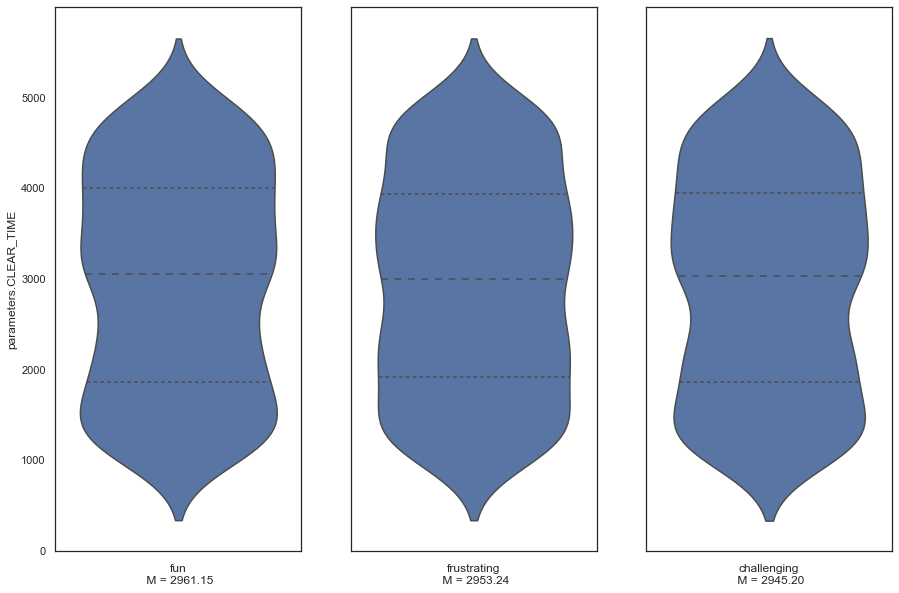

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

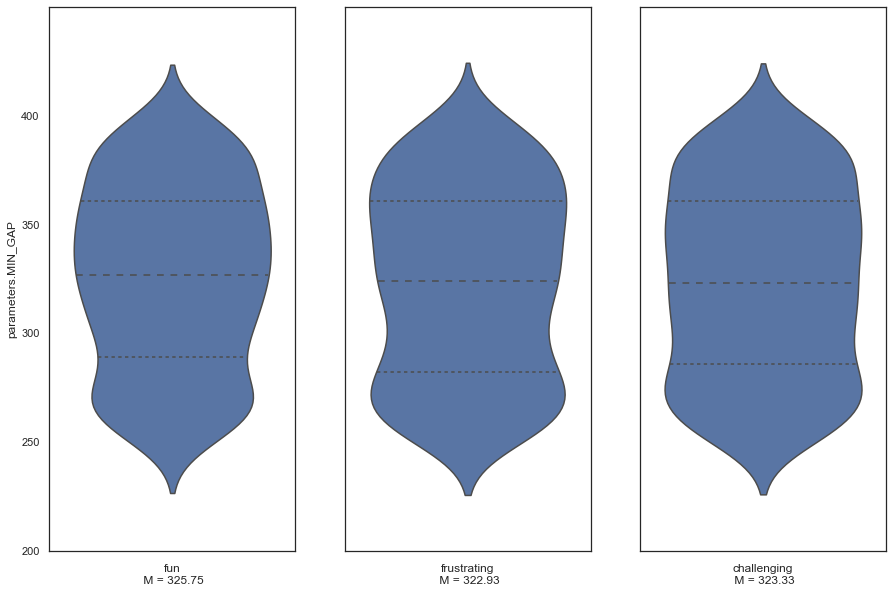

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

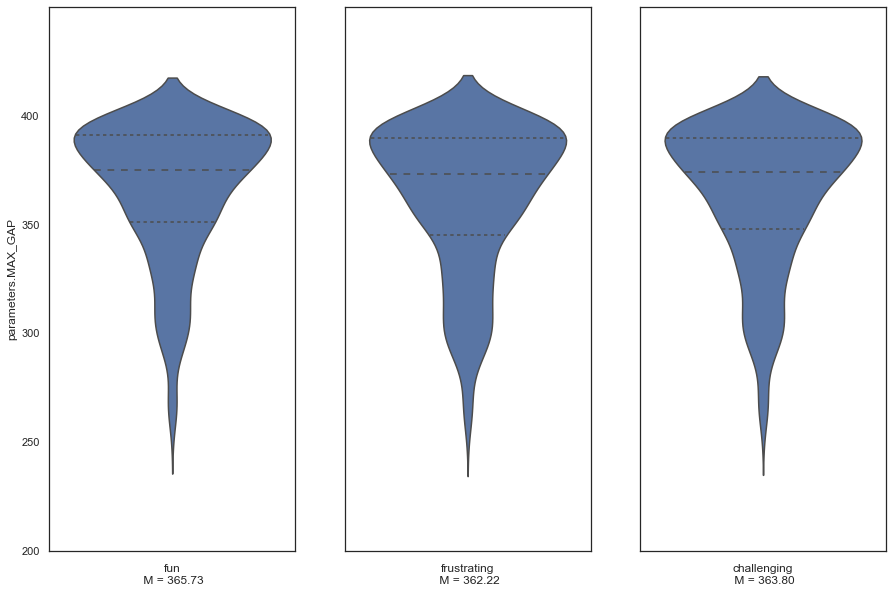

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

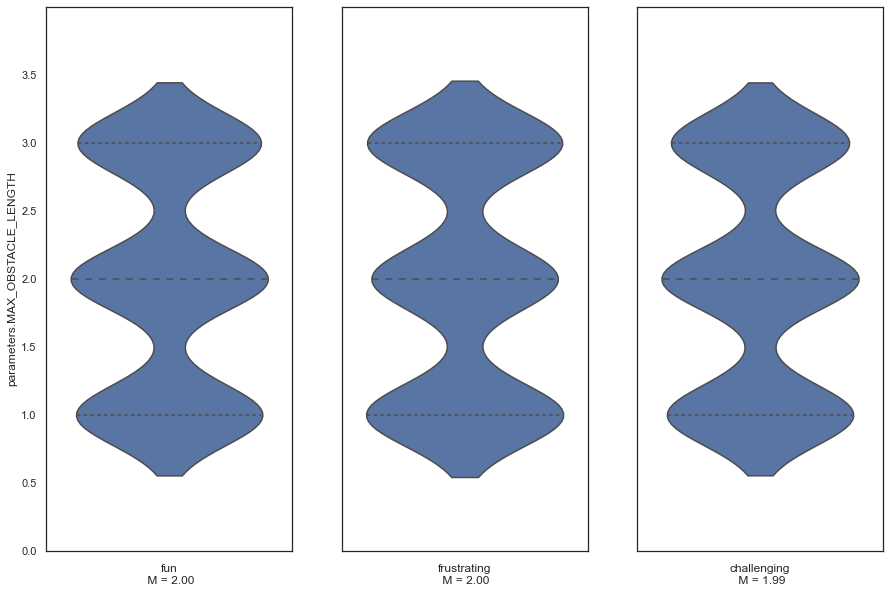

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

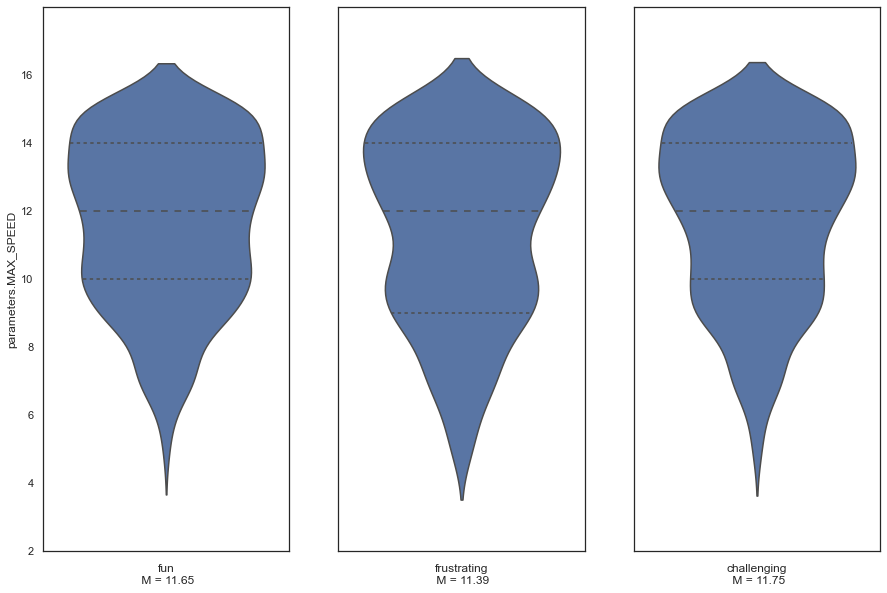

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

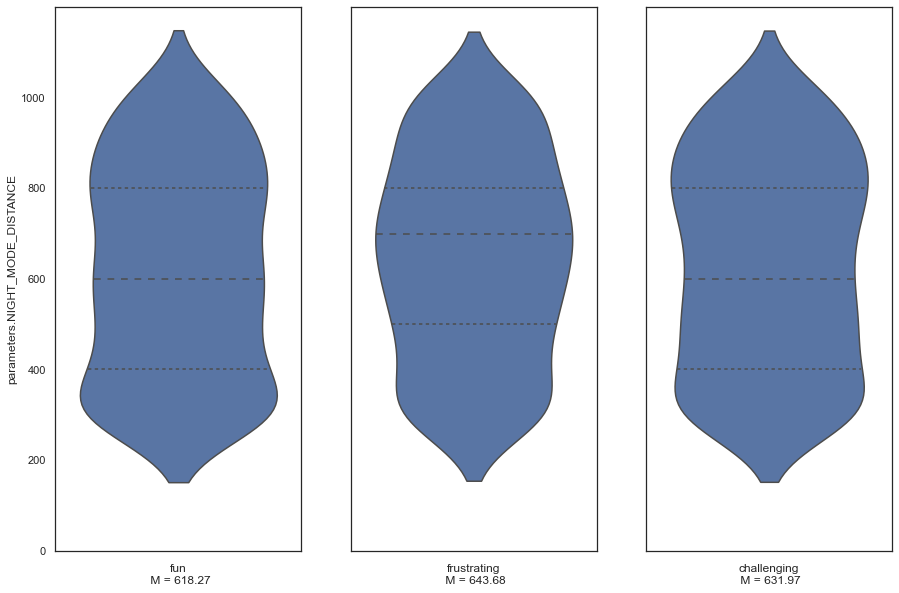

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

In [77]:
# ----------------------------------------------------------------------------------------------------------------
def explode_positive_counts_of(x): # questionresonses
    a = questionresponses
    a = a.explode(x)
    a['selected'] = np.where(a[x]=='secondlastentry', a['secondlastentry'], a['lastentry'])
    return a[[x, 'selected']]

def append_column_on_selected_id(db, parameter):
    a = db.merge(gameplays, left_on='selected', right_on='_id.$oid')
    return a[[parameter, "selected"]]

# ----------------------------------------------------------------------------------------------------------------

def draw_violin_plot(data, ax, ylabel, xlabel, range_min, range_max, y_ticks, ylabels = True):
    
    plt.figure()
    g = sns.violinplot(y=data,  inner="quartile", ax=ax)
    g.set(ylim=(range_min, range_max))
    ax.yaxis.set_ticks(y_ticks)
    if not ylabels:
        ax.yaxis.set_ticklabels([])
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    
    
def draw_violin_plots(parameter, range_min, range_max):
    fig, axs = plt.subplots(ncols=3)
    exploded = explode_positive_counts_of("fun")
    s = append_column_on_selected_id(exploded, parameter)
    bounds = nice_bounds(range_min, range_max, 10)
    draw_violin_plot(
        data = s[parameter], 
        ax = axs[0], 
        y_ticks = np.arange(bounds[0], bounds[1], bounds[2]),
        xlabel = "fun\n M = %.2f"% (s[parameter].mean()),
        ylabel = parameter,
        range_min = range_min,
        range_max = range_max
    )

    exploded = explode_positive_counts_of("frustrating")
    s = append_column_on_selected_id(exploded, parameter)
    draw_violin_plot(
        data = s[parameter], 
        ax = axs[1],  
        y_ticks = np.arange(bounds[0], bounds[1], bounds[2]),
        ylabels = False,
        xlabel = "frustrating\n M = %.2f"% (s[parameter].mean()),
        ylabel = "",
        range_min = range_min,
        range_max = range_max
    )
        

    exploded = explode_positive_counts_of("challenging")
    s = append_column_on_selected_id(exploded, parameter)
    draw_violin_plot(
        data = s[parameter], 
        ax = axs[2], 
        y_ticks = np.arange(bounds[0], bounds[1], bounds[2]),
        ylabels = False,
        xlabel = "challenging\n M = %.2f"% (s[parameter].mean()),
        ylabel = "",
        range_min = range_min,
        range_max = range_max
    )

sns.set(style='white', context='notebook', rc={'figure.figsize':(15,10)})

draw_violin_plots('actualDistance', -1000, 5500)
draw_violin_plots('nr_jumps', -100, 650)
draw_violin_plots('distance_per_jump',-30, 500)
draw_violin_plots('parameters.NIGHT_MODE_ENABLED',-1, 2)
draw_violin_plots('parameters.SPEED',4, 12)
draw_violin_plots('parameters.CLEAR_TIME',0, 6000)
draw_violin_plots('parameters.MIN_GAP',200, 450)
draw_violin_plots('parameters.MAX_GAP',200, 450)
draw_violin_plots('parameters.MAX_OBSTACLE_LENGTH',0, 4)
draw_violin_plots('parameters.MAX_SPEED',3, 18)
# conditional: night_mode_distance only for games where night_mode_enabled
old_gameplays = gameplays
coll = gameplays.loc[gameplays["parameters.NIGHT_MODE_ENABLED"] == True]
gameplays = coll
draw_violin_plots('parameters.NIGHT_MODE_DISTANCE', 150, 1200)
gameplays = old_gameplays

